<a href="https://colab.research.google.com/github/Jaquelinecs/workshop4her-classificador-spam/blob/main/Projeto_an%C3%A1lise_spam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='#0660a2'>  **Projeto final Workshop4Her - 2023**

##**Classificador de spam**



#<font color='#0660a2'> **Importando as bibliotecas necessárias**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk

# <font color='#0660a2'> **Lendo o dataset**

In [ ]:
df = pd.read_csv('spam.csv', index_col=0)    # Lembre-se de abrir o dataset em sua versão LIMPA!
df.reset_index(inplace = True)    # Deixa os índices no tipo [0, 1, ..., N-1].
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#Roteiro para a resolução do projeto

* Realizar o pré-processamento dos dados em texto bruto;
* Transformar os textos em algo operacionalizável pelo computador através da técnica de bag-of-words;
* Separar o dataset em treino (com classe) e teste (sem classe);
* Criar um modelo Naive Bayes para prever a classe dos dados de teste;
* Avaliar o desempenho do modelo desenvolvido.

DICA: repare que o dataset trabalhado contém um número muito
maior de "ham" do que de "spam".


#<font color='#0660a2'>  **Pré-processamento dos dados**

## Tokenizando os dados para realizar a stemização e lematização

In [ ]:
from nltk.tokenize import word_tokenize  # Para dividir em palavras.
nltk.download('punkt')   # Modelo treinado para identificar os pontos nos quais uma sentença ou palavra termina e outra começa, garantindo uma tokenização inteligente.
df['v2'] = df['v2'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Stemizando nosso texto com o LancasterStemmer

In [ ]:
lancaster = nltk.LancasterStemmer()
lancaster_list = []
for i in range(len(df.v2)):
    lancaster_tokens = []
    for word in df.v2[i]:
        lancaster_tokens.append(lancaster.stem(word))
    lancaster_list.append(lancaster_tokens)


##Juntando a lista de listas de palavras em uma lista de sentenças

In [ ]:
lancaster_text = []
for i in lancaster_list:
     lancaster_text.append(' '.join(i))



## Substituindo nossos valores antigos de "v2" pelas novas frases stemizadas

In [ ]:
df.v2 = lancaster_text

In [ ]:
df.head()

,v1,v2
0,ham,"go until jurong point , crazy .. avail on in b..."
1,ham,ok lar ... jok wif u on ...
2,spam,fre entry in 2 a wkly comp to win fa cup fin t...
3,ham,u dun say so ear hor ... u c already then say ...
4,ham,"nah i do n't think he goe to usf , he liv arou..."


# Separando os dados em "treino" e "teste"



## Dividindo nossos dados em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(df.v2, df.v1, test_size=0.2, stratify=df.v1, random_state=42)

## Arrumando os índices

In [ ]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)
train_labels.reset_index(drop=True, inplace=True)
test_labels.reset_index(drop=True, inplace=True)

#<font color='#0660a2'> **Bag-of-words**

#formatar os nossos dados textuais para que eles sejam listas de frases

In [ ]:
print('Dado de treino antes da formatação: \n', train)



Dado de treino antes da formatação: 
 0                                 going on noth great.bye
1                          i wont . so wat 's wit the guy
2              ok k .. sry i knw 2 siv .. tat y i askd ..
3       wher ar you ? what do you do ? how can you sta...
4                    hav you not fin work yet or someth ?
                              ...                        
4452                                   jus fin avat nigro
4453                             jus fin watch tv ... u ?
4454    moby pub quiz.win a �100 high street priz if u...
4455    fre entry in 2 a week comp for a chant to win ...
4456    noth but we jus tot u would ask cos u ba gua ....
Name: v2, Length: 4457, dtype: object


## Formatando

In [ ]:
train = train.tolist()
test = test.tolist()

print('\nDado de treino depois da formatação: \n', train)


Dado de treino depois da formatação: 
 ['going on noth great.bye', "i wont . so wat 's wit the guy", 'ok k .. sry i knw 2 siv .. tat y i askd ..', "wher ar you ? what do you do ? how can you stand to be away from me ? doe n't yo heart ach without me ? do n't you wond of me ? do n't you crav me ?", 'hav you not fin work yet or someth ?', 'hhahhaahahah rofl wtf nig was leonardo in yo room or someth', 'wot u up 2 j ?', "hiy , sorry did n't hav sign . i hav n't seen or heard from and neith has , which is unus in itself ! i 'll put on the cas and get him to sort it out ! hug and snog .", 'we r outsid already .', "fre nok or motorol with upto 12mths 1/2price lin , 500 fre x-net min & 100txt/mth fre b'tooth * . cal mobileupd8 on 08001950382 or cal 2optout/d3wv", 'how is yo schedule next week ? i am out of town thi weekend .', 'goodmorn , today i am lat for 1hr .', "dizzamn , aight i 'll ask my suitem when i get back", 'why must we sit around and wait for sum day to celebr . such a mag sight 

## Agrupar os nossos dados de treino com nossos dados de teste em uma única lista, já que a função de BOW precisa processá-los juntos

In [ ]:
all_sentences = train + test
print('Frases juntas em uma única lista:\n', all_sentences)

Frases juntas em uma única lista:
 ['going on noth great.bye', "i wont . so wat 's wit the guy", 'ok k .. sry i knw 2 siv .. tat y i askd ..', "wher ar you ? what do you do ? how can you stand to be away from me ? doe n't yo heart ach without me ? do n't you wond of me ? do n't you crav me ?", 'hav you not fin work yet or someth ?', 'hhahhaahahah rofl wtf nig was leonardo in yo room or someth', 'wot u up 2 j ?', "hiy , sorry did n't hav sign . i hav n't seen or heard from and neith has , which is unus in itself ! i 'll put on the cas and get him to sort it out ! hug and snog .", 'we r outsid already .', "fre nok or motorol with upto 12mths 1/2price lin , 500 fre x-net min & 100txt/mth fre b'tooth * . cal mobileupd8 on 08001950382 or cal 2optout/d3wv", 'how is yo schedule next week ? i am out of town thi weekend .', 'goodmorn , today i am lat for 1hr .', "dizzamn , aight i 'll ask my suitem when i get back", 'why must we sit around and wait for sum day to celebr . such a mag sight when 

## Importando as dependências necessárias

In [ ]:

from sklearn.feature_extraction.text import CountVectorizer

def bow(textos):
  """ Entrada: uma lista de textos limpos.
  Saída: um vetor que indica quais são as palavras presentes nos textos e a quantidade de vezes que tais vocábulos aparecem. """
  vectorizer = CountVectorizer()    # Cria um objeto do tipo "Vetor de Contagem".
  frequencies = vectorizer.fit_transform(textos).toarray()    # Modeliza os textos de acordo com o vetor (transforma em contagens).
  return frequencies


## Aplicando a função de BOW em nosso conjunto de dados

In [ ]:
bow_all = bow(all_sentences)

## Separar novamente nossos dados em treino e teste

In [ ]:
train = (bow_all)[:len(train)]    # Do zero até o tamanho da lista de frases de treino, já que "train" veio antes.
test = (bow_all)[-len(test):]    # De trás para frente, do último item até o tamanho da lista de frases de teste, já que "test" veio depois.

##<font color='#0660a2'> **Implementação do algoritmo Naive Bayes**

In [ ]:
print('Dados de treino: \n', train)
print('Dados de teste: \n',test)
print('Labels de treino: \n', train_labels)
print('Labels de teste: \n', test_labels)

Dados de treino: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Dados de teste: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Labels de treino: 
 0        ham
1        ham
2        ham
3        ham
4        ham
        ... 
4452     ham
4453     ham
4454    spam
4455    spam
4456     ham
Name: v1, Length: 4457, dtype: object
Labels de teste: 
 0        ham
1        ham
2        ham
3       spam
4        ham
        ... 
1110     ham
1111     ham
1112     ham
1113     ham
1114     ham
Name: v1, Length: 1115, dtype: object


## Mudar o formato das labels


In [ ]:
train_labels = train_labels.to_list()
test_labels = test_labels.to_list()

#Importar o modelo pronto do Sklearn para rodar o Naive Bayes

## Importar as dependências necessárias

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline


## Para criar o modelo

In [ ]:
model = MultinomialNB()

## Para treinar o modelo com os dados de treino

In [ ]:
model.fit(train, train_labels)

MultinomialNB()

## Para predizer as categorias dos dados de teste

In [ ]:
predicted_categories = model.predict(test)

In [ ]:
print('As labels preditas são:', predicted_categories)

As labels preditas são: ['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


##<font color='#0660a2'> **Verificação do desempenho do modelo**

## Importando as bilbiotecas de métricas

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Plotando uma matriz de confusão

<Axes: >

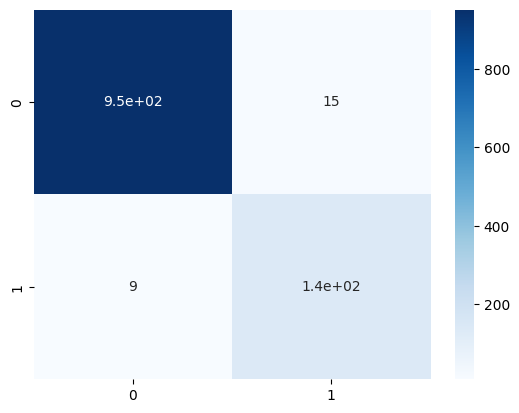

In [ ]:

matrix = confusion_matrix(test_labels, predicted_categories)
sns.heatmap(matrix, annot=True, cmap='Blues')



## Verificando a acurácia

In [ ]:

accuracy = accuracy_score(test_labels, predicted_categories)
print('A acurácia encontrada é de:', accuracy)

A acurácia encontrada é de: 0.97847533632287


In [1]:
!git clone https://github.com/Jaquelinecs/workshop4her-classificador-spam


Cloning into 'workshop4her-classificador-spam'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), done.
Resolving deltas: 100% (1/1), done.


In [2]:
!git add .
!git commit -m "Adicionando novas funcionalidades"
!git push origin main  # Ou nome da branch que está usando

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
